<a href="https://colab.research.google.com/github/aryan802/EDA_Project_Collab_Notebook/blob/main/22BDS0266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===========================

Name: Aryan Jain

Roll No: 22BDS0266

============================

Phase 1

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

Loading Dataset

In [27]:
# Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/credit%20card.csv"
df = pd.read_csv(url)

In [28]:
# Dimensions
print("\n--- Dataset Dimensions ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


--- Dataset Dimensions ---
Rows: 5000, Columns: 14


In [29]:
# Summary Statistics
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- First 5 Rows ---")
print(df.head())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  5000 non-null   object 
 11  CD Account          5000 non-null   object 
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(9), object(4)
memory usage: 547.0+ KB
None

--- Summary Stati

Data Handling and Cleaning

In [18]:
# Missing Value Analysis
# Treat "?" as NaN
df = pd.read_csv(url, na_values=['?'])
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percent})

print("\n--- Missing Values ---")
print(missing_df[missing_df['Missing Values'] > 0])


--- Missing Values ---
                    Missing Values  Percentage
Personal Loan                   11        0.22
Securities Account               1        0.02
CD Account                       2        0.04
CreditCard                       1        0.02


Data Cleaning

In [31]:
# Numeric columns - fill with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns - fill with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

print("\nMissing values handled (median/mode), duplicates removed")


Missing values handled (median/mode), duplicates removed


/tmp/ipython-input-133480455.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


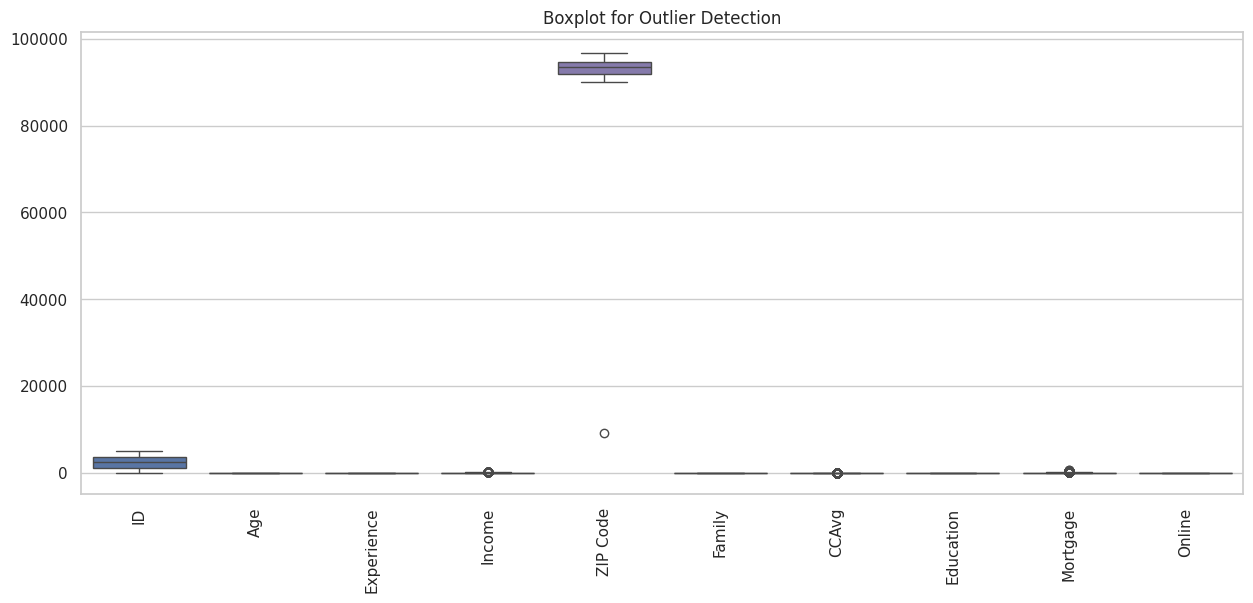

In [32]:
# Outlier Detection
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

Univariate Analysis

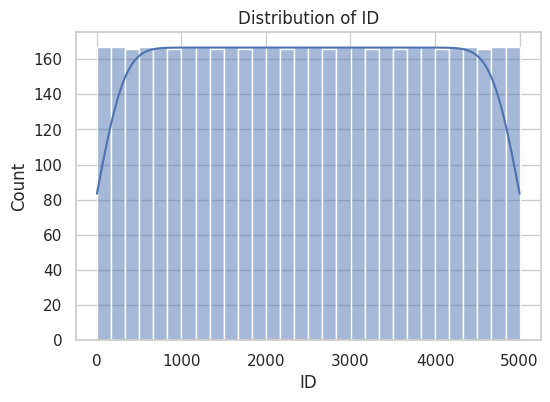

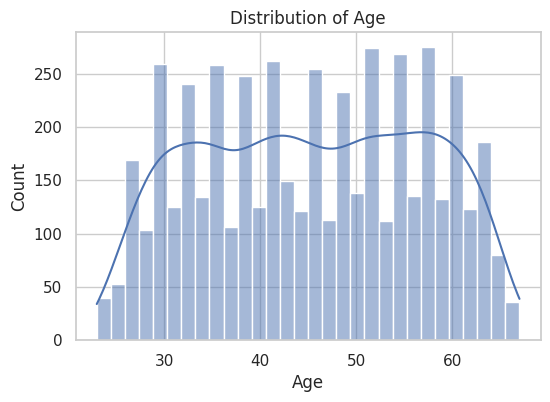

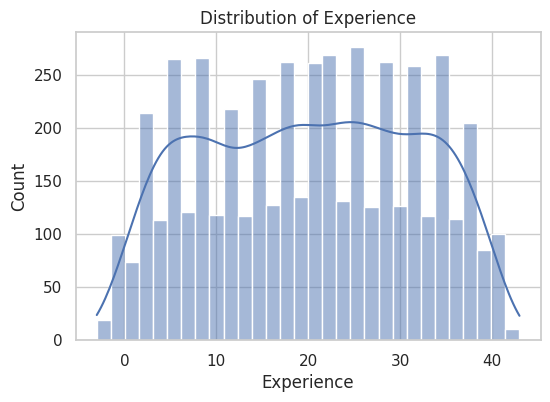

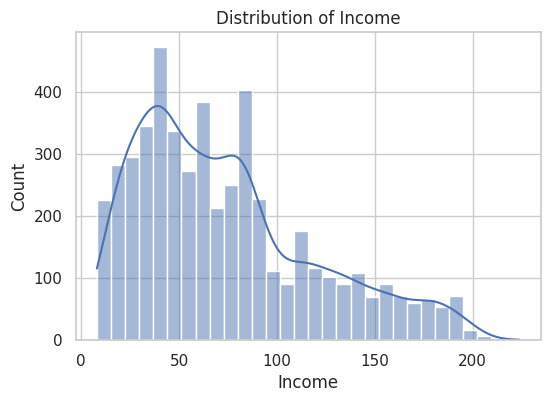

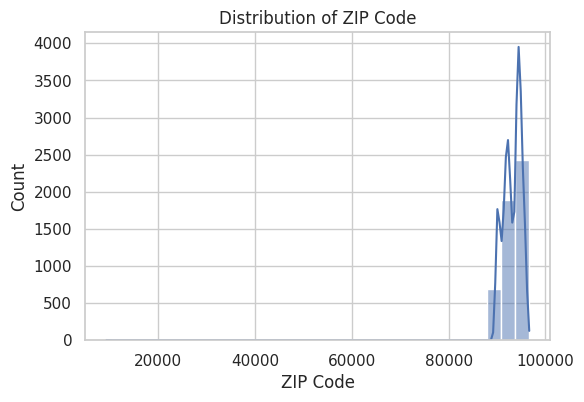

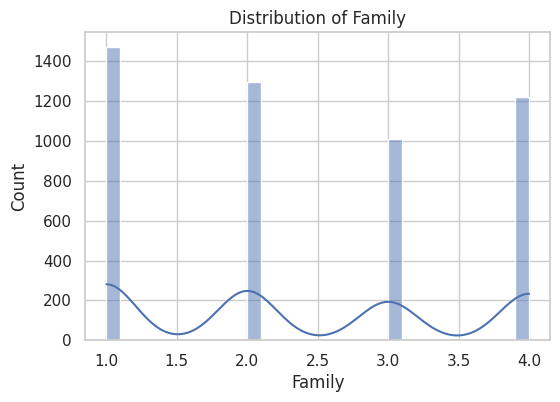

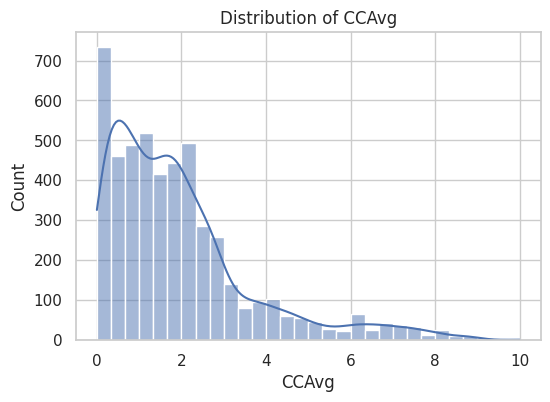

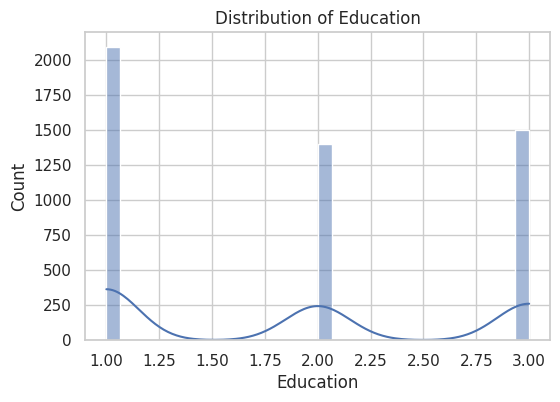

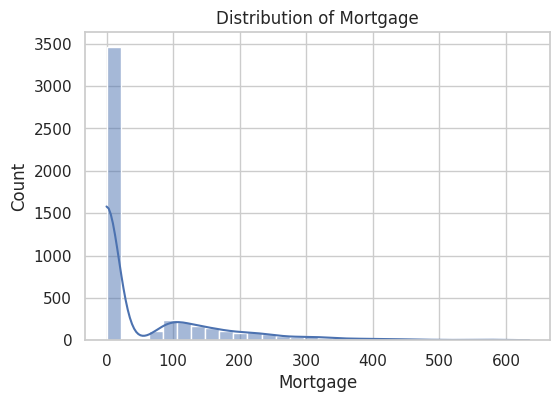

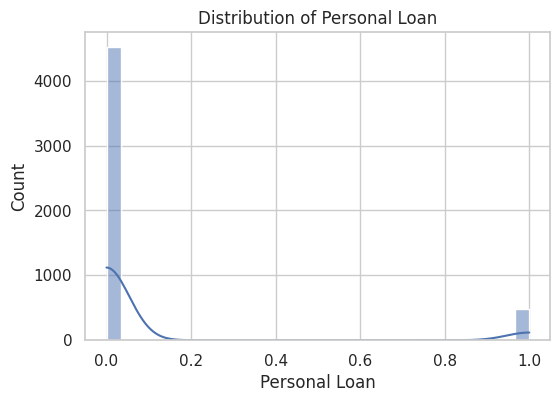

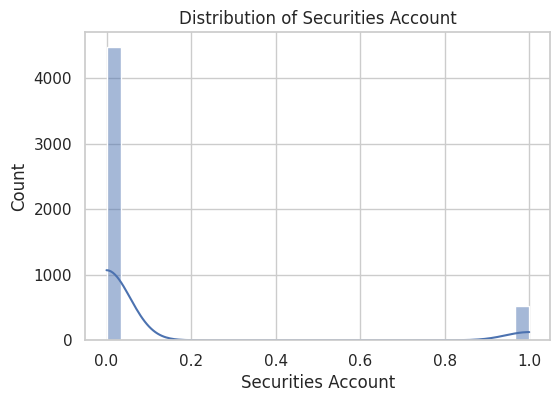

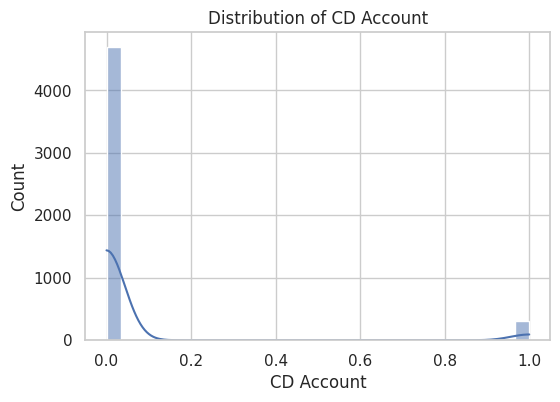

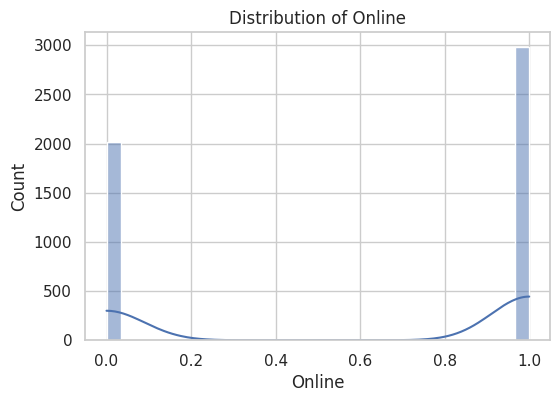

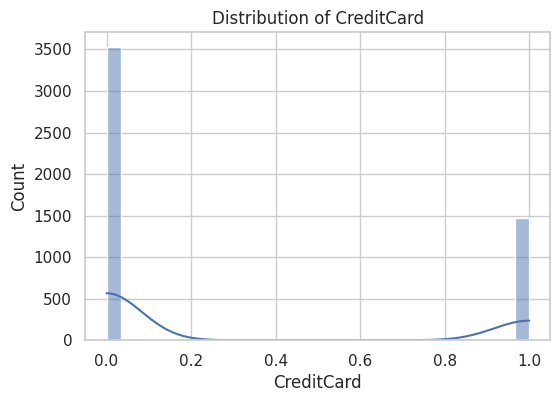

In [24]:
# Univariate Analysis

# Numeric columns distribution
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns distribution
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

Bivariate Analysis

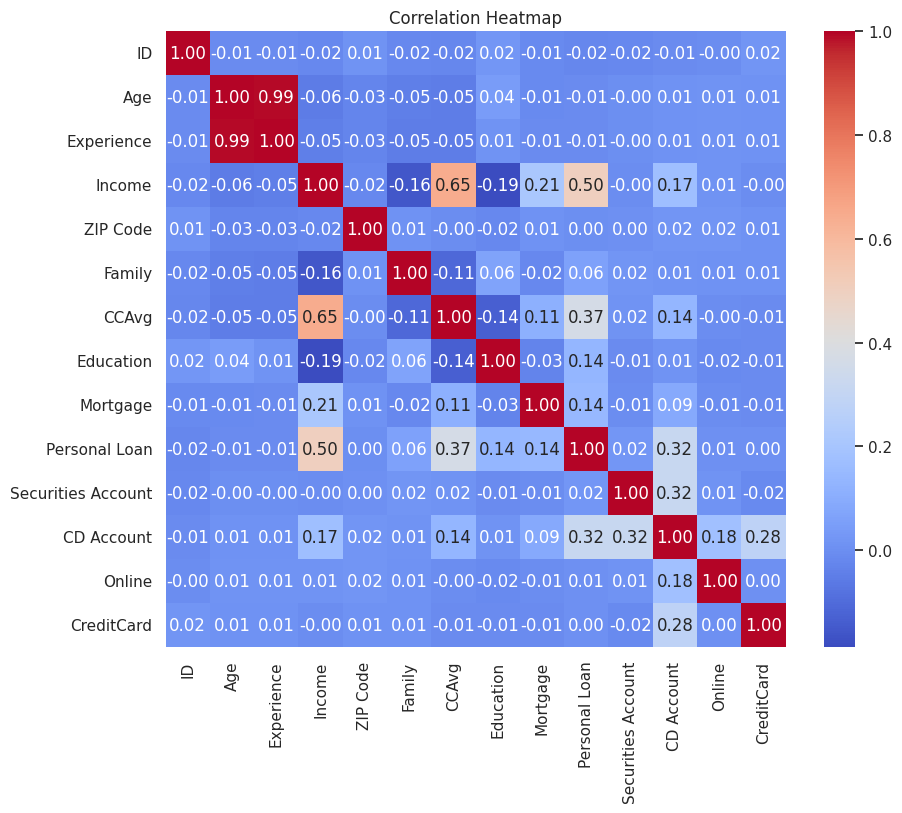

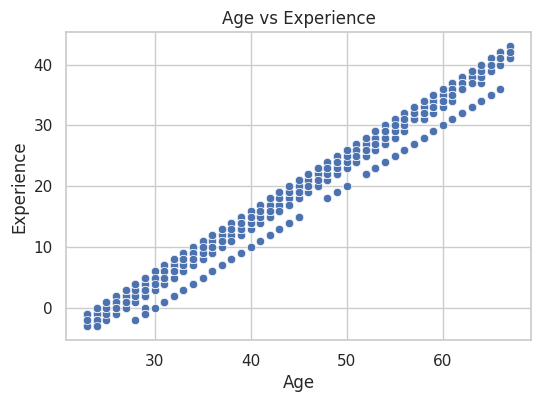

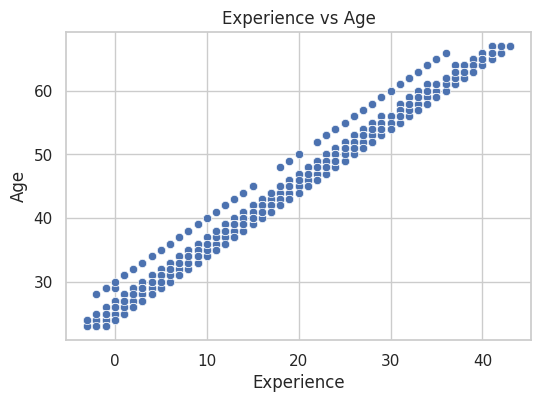

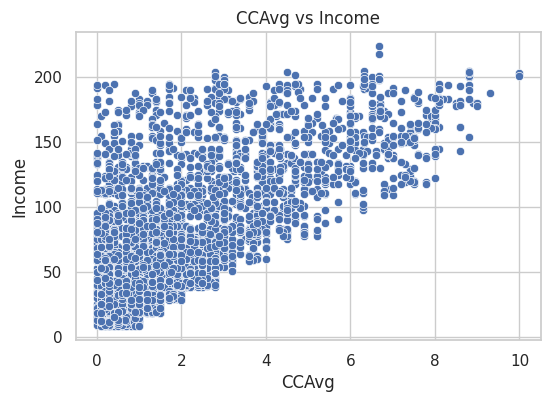

In [25]:
# Bivariate Analysis

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for highly correlated pairs
top_corr = corr.abs().unstack().sort_values(ascending=False)
top_pairs = [pair for pair in top_corr.index if pair[0] != pair[1]][:3]
for x, y in top_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f"{x} vs {y}")
    plt.show()

# Boxplots for numerical vs categorical
for col in cat_cols:
    for num in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col, y=num, data=df)
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

Multivariate Analysis

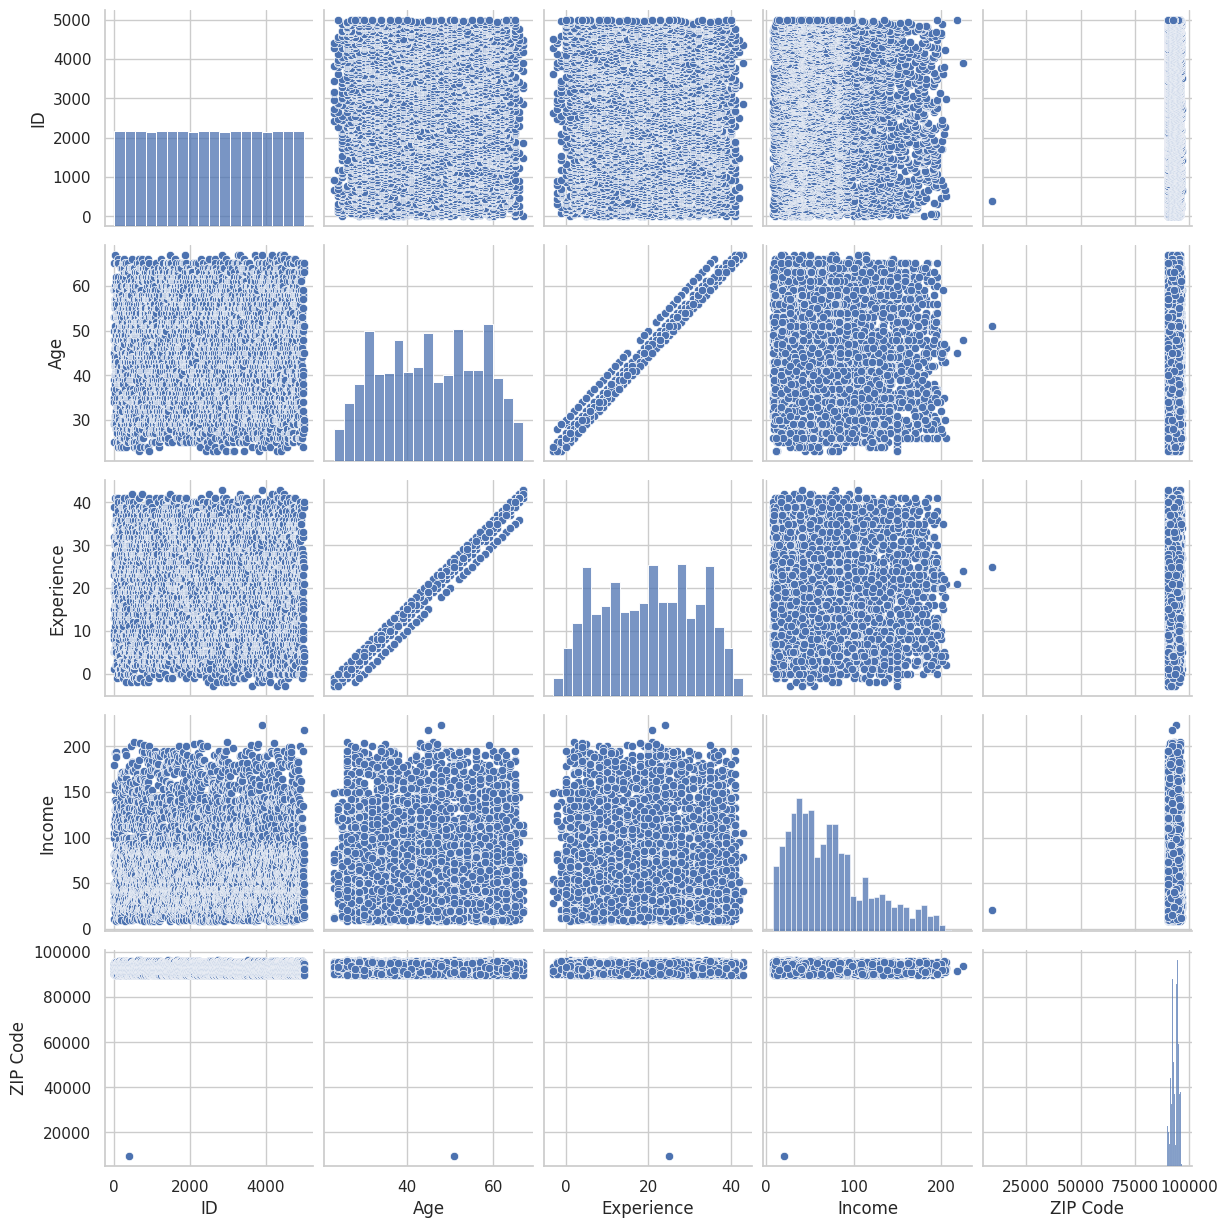

In [26]:
# Multivariate Analysis
# Pairplot (first 5 numeric columns for clarity)
sns.pairplot(df[numeric_cols[:5]])
plt.show()

# Grouped bar plot example (if 2+ categorical columns exist)
if len(cat_cols) >= 2:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=cat_cols[0], hue=cat_cols[1], data=df)
    plt.title(f"{cat_cols[0]} by {cat_cols[1]}")
    plt.show()